In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import os, glob

filename = os.path.join(os.getcwd(), "the_office_lines_scripts.csv")
df = pd.read_csv(filename)
df

,id,season,episode,scene,line_text,speaker,deleted
0,1,1,1,1,All right Jim. Your quarterlies look very good...,Michael,False
1,2,1,1,1,"Oh, I told you. I couldn't close it. So...",Jim,False
2,3,1,1,1,So you've come to the master for guidance? Is ...,Michael,False
3,4,1,1,1,"Actually, you called me in here, but yeah.",Jim,False
4,5,1,1,1,"All right. Well, let me show you how it's done.",Michael,False
...,...,...,...,...,...,...,...
59904,59905,9,23,112,It all seems so very arbitrary. I applied for ...,Creed,False
59905,59906,9,23,113,I just feel lucky that I got a chance to share...,Meredith,False
59906,59907,9,23,114,I���m happy that this was all filmed so I can ...,Phyllis,False
59907,59908,9,23,115,I sold paper at this company for 12 years. My ...,Jim,False


In [2]:
df_speakers = df.groupby(['speaker']).size().reset_index(name='Speaker Count')
df_speakers.sort_values(by=['Speaker Count'], ascending = False)
df_speakers

,speaker,Speaker Count
0,(Pam's mom) Heleen,1
1,3rd Athlead Employee,1
2,4th Athlead Employee,1
3,A.J.,8
4,AJ,23
...,...,...
788,[Clark and Pete are shown on screen]\nVideo An...,1
789,[repeats]\nAndy: Fail,1
790,abe,1
791,sAndy,1


In [3]:
df_characters = df_speakers[df_speakers.iloc[:,1] >= 1500] 
df_characters

,speaker,Speaker Count
24,Andy,3968
40,Angela,1695
214,Dwight,7531
357,Jim,6816
387,Kevin,1708
463,Michael,12140
545,Pam,5376


### How many characters are there? What are their names?
There are 793 speakers with lines from "The Office". The number of characters depends on who is important enough to have multiple speaking lines across episodes and seasons. I counted characters who speak more than 1500 times across all seasons and episodes.

Their names based on number of lines across all episodes are Andy, Angela, Dwight, Jim, Kevin, Michael, and Pam.

In [4]:
df_char = df[df['speaker'].isin(df_characters['speaker'])]
df_lines = df_char.groupby(['speaker']).size().reset_index(name='Speaker Count')

### Who has the most lines across all episodes?
Michael has the most lines across all episodes at 12140 instances of speaking total.

In [5]:
df_char["Number of Words"] = df_char["line_text"].apply(lambda n: len(n.split()))
df_char

/var/folders/p_/rr1hwkg50s1d8bw8c286g0ww0000gn/T/ipykernel_22573/2953969891.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_char["Number of Words"] = df_char["line_text"].apply(lambda n: len(n.split()))


,id,season,episode,scene,line_text,speaker,deleted,Number of Words
0,1,1,1,1,All right Jim. Your quarterlies look very good...,Michael,False,14
1,2,1,1,1,"Oh, I told you. I couldn't close it. So...",Jim,False,9
2,3,1,1,1,So you've come to the master for guidance? Is ...,Michael,False,14
3,4,1,1,1,"Actually, you called me in here, but yeah.",Jim,False,8
4,5,1,1,1,"All right. Well, let me show you how it's done.",Michael,False,10
...,...,...,...,...,...,...,...,...
59895,59896,9,23,108,Oscar. Oscar. [crying] I think I���m gay.,Kevin,False,7
59897,59898,9,23,108,[sniffles] It���s just that I���m so emotional.,Kevin,False,7
59899,59900,9,23,108,"No, but maybe the reason���",Kevin,False,5
59907,59908,9,23,115,I sold paper at this company for 12 years. My ...,Jim,False,46


In [6]:
total = df_char.loc[df_char['speaker'] == 'Andy', 'Number of Words'].sum()
round(total / 3968)

13

In [7]:
total = df_char.loc[df_char['speaker'] == 'Angela', 'Number of Words'].sum()
round(total / 1695)

9

In [8]:
total = df_char.loc[df_char['speaker'] == 'Dwight', 'Number of Words'].sum()
round(total / 7531)

12

In [9]:
total = df_char.loc[df_char['speaker'] == 'Jim', 'Number of Words'].sum()
round(total / 6816)

10

In [10]:
total = df_char.loc[df_char['speaker'] == 'Kevin', 'Number of Words'].sum()
round(total / 1708)

9

In [11]:
total = df_char.loc[df_char['speaker'] == 'Michael', 'Number of Words'].sum()
round(total / 12140)

15

In [12]:
total = df_char.loc[df_char['speaker'] == 'Pam', 'Number of Words'].sum()
round(total / 5376)

9

The average words per line for each character are below:
- Andy: 13 words/line
- Angela: 9 words/line
- Dwight: 12 words/line
- Jim: 10 words/line
- Kevin: 9 words/line
- Michael: 15 words/line
- Pam: 9 words/line

I would have used a loop to iterate through the list of speakers and divide by the corresponding value of how many times they have spoken. However, due to time constraints, I did the calculations manually.

In [13]:
import nltk
from nltk.corpus import stopwords

df_char['line_text_lower'] = df_char.line_text.str.lower().str.replace('\W', ' ')

df_char['Token'] = df_char.line_text_lower.apply(nltk.tokenize.word_tokenize)

df_char

/var/folders/p_/rr1hwkg50s1d8bw8c286g0ww0000gn/T/ipykernel_22573/1362844917.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df_char['line_text_lower'] = df_char.line_text.str.lower().str.replace('\W', ' ')
/var/folders/p_/rr1hwkg50s1d8bw8c286g0ww0000gn/T/ipykernel_22573/1362844917.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_char['line_text_lower'] = df_char.line_text.str.lower().str.replace('\W', ' ')
/var/folders/p_/rr1hwkg50s1d8bw8c286g0ww0000gn/T/ipykernel_22573/1362844917.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.py

,id,season,episode,scene,line_text,speaker,deleted,Number of Words,line_text_lower,Token
0,1,1,1,1,All right Jim. Your quarterlies look very good...,Michael,False,14,all right jim your quarterlies look very good...,"[all, right, jim, your, quarterlies, look, ver..."
1,2,1,1,1,"Oh, I told you. I couldn't close it. So...",Jim,False,9,oh i told you i couldn t close it so,"[oh, i, told, you, i, couldn, t, close, it, so]"
2,3,1,1,1,So you've come to the master for guidance? Is ...,Michael,False,14,so you ve come to the master for guidance is ...,"[so, you, ve, come, to, the, master, for, guid..."
3,4,1,1,1,"Actually, you called me in here, but yeah.",Jim,False,8,actually you called me in here but yeah,"[actually, you, called, me, in, here, but, yeah]"
4,5,1,1,1,"All right. Well, let me show you how it's done.",Michael,False,10,all right well let me show you how it s done,"[all, right, well, let, me, show, you, how, it..."
...,...,...,...,...,...,...,...,...,...,...
59895,59896,9,23,108,Oscar. Oscar. [crying] I think I���m gay.,Kevin,False,7,oscar oscar crying i think i m gay,"[oscar, oscar, crying, i, think, i, m, gay]"
59897,59898,9,23,108,[sniffles] It���s just that I���m so emotional.,Kevin,False,7,sniffles it s just that i m so emotional,"[sniffles, it, s, just, that, i, m, so, emotio..."
59899,59900,9,23,108,"No, but maybe the reason���",Kevin,False,5,no but maybe the reason,"[no, but, maybe, the, reason]"
59907,59908,9,23,115,I sold paper at this company for 12 years. My ...,Jim,False,46,i sold paper at this company for 12 years my ...,"[i, sold, paper, at, this, company, for, 12, y..."


In [14]:
df_andy = df_char.loc[df_char['speaker'] == 'Andy']

andy_words = df_andy.Token.tolist()
words = [word for list_ in andy_words for word in list_]

In [15]:
nltk.download('stopwords')

word_dist = nltk.FreqDist(words)
stop = stopwords.words('english')
words_except_stop_dist = nltk.FreqDist(w for w in words if w not in stop)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/lianzou/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [16]:
word_count = pd.DataFrame(words_except_stop_dist.most_common(10), columns=['Word', 'Frequency'])
word_count

,Word,Frequency
0,like,331
1,know,292
2,yeah,278
3,right,229
4,oh,226
5,get,188
6,well,187
7,got,182
8,na,168
9,one,165


In [17]:
df_angela = df_char.loc[df_char['speaker'] == 'Angela']

angela_words = df_angela.Token.tolist()
words = [word for list_ in angela_words for word in list_]
word_dist = nltk.FreqDist(words)
stop = stopwords.words('english')
words_except_stop_dist = nltk.FreqDist(w for w in words if w not in stop)
word_count = pd.DataFrame(words_except_stop_dist.most_common(10), columns=['Word', 'Frequency'])
word_count

,Word,Frequency
0,dwight,117
1,oh,103
2,know,92
3,like,75
4,kevin,59
5,think,59
6,want,57
7,get,57
8,yes,56
9,well,55


In [18]:
df_dwight = df_char.loc[df_char['speaker'] == 'Dwight']

dwight_words = df_dwight.Token.tolist()
words = [word for list_ in dwight_words for word in list_]
word_dist = nltk.FreqDist(words)
stop = stopwords.words('english')
words_except_stop_dist = nltk.FreqDist(w for w in words if w not in stop)
word_count = pd.DataFrame(words_except_stop_dist.most_common(10), columns=['Word', 'Frequency'])
word_count

,Word,Frequency
0,jim,482
1,oh,480
2,michael,445
3,know,423
4,okay,352
5,get,340
6,like,340
7,one,310
8,go,299
9,right,280


In [19]:
df_jim = df_char.loc[df_char['speaker'] == 'Jim']

jim_words = df_jim.Token.tolist()
words = [word for list_ in jim_words for word in list_]
word_dist = nltk.FreqDist(words)
stop = stopwords.words('english')
words_except_stop_dist = nltk.FreqDist(w for w in words if w not in stop)
word_count = pd.DataFrame(words_except_stop_dist.most_common(10), columns=['Word', 'Frequency'])
word_count

,Word,Frequency
0,oh,555
1,know,548
2,dwight,430
3,right,423
4,yeah,413
5,okay,385
6,pam,356
7,hey,332
8,really,331
9,think,328


In [20]:
df_kevin = df_char.loc[df_char['speaker'] == 'Kevin']

kevin_words = df_kevin.Token.tolist()
words = [word for list_ in kevin_words for word in list_]
word_dist = nltk.FreqDist(words)
stop = stopwords.words('english')
words_except_stop_dist = nltk.FreqDist(w for w in words if w not in stop)
word_count = pd.DataFrame(words_except_stop_dist.most_common(10), columns=['Word', 'Frequency'])
word_count

,Word,Frequency
0,yeah,132
1,oh,109
2,like,105
3,michael,89
4,know,74
5,think,67
6,get,59
7,pam,56
8,well,56
9,oscar,56


In [21]:
df_michael = df_char.loc[df_char['speaker'] == 'Michael']

michael_words = df_michael.Token.tolist()
words = [word for list_ in michael_words for word in list_]
word_dist = nltk.FreqDist(words)
stop = stopwords.words('english')
words_except_stop_dist = nltk.FreqDist(w for w in words if w not in stop)
word_count = pd.DataFrame(words_except_stop_dist.most_common(10), columns=['Word', 'Frequency'])
word_count

,Word,Frequency
0,know,1369
1,oh,1039
2,okay,984
3,like,882
4,well,821
5,right,817
6,go,749
7,going,736
8,good,728
9,get,662


In [22]:
df_pam = df_char.loc[df_char['speaker'] == 'Pam']

pam_words = df_pam.Token.tolist()
words = [word for list_ in pam_words for word in list_]
word_dist = nltk.FreqDist(words)
stop = stopwords.words('english')
words_except_stop_dist = nltk.FreqDist(w for w in words if w not in stop)
word_count = pd.DataFrame(words_except_stop_dist.most_common(10), columns=['Word', 'Frequency'])
word_count

,Word,Frequency
0,oh,471
1,michael,371
2,yeah,368
3,know,338
4,jim,336
5,like,316
6,okay,289
7,hey,269
8,really,257
9,think,234


### What is the most common word per character?
The most common word for each character are below:
- Andy: Like
- Angela: Dwight
- Dwight: Jim
- Jim: Oh
- Kevin: Yeah
- Michael: Oh
- Pam: No

I would have somehow combined all tokenized word for each speaker and found the most common one that way, but due to time constraints, I did the calculations manually.

In [23]:
df_char.groupby(['season', 'episode']).size().reset_index(name='Line Count') # there are 186 episodes total

,season,episode,Line Count
0,1,1,222
1,1,2,216
2,1,3,269
3,1,4,297
4,1,5,233
...,...,...,...
181,9,19,125
182,9,20,125
183,9,21,258
184,9,22,323


In [24]:
186 - len(df_andy.groupby(['season', 'episode']).size().reset_index(name='Line Count'))

42

In [25]:
186 - len(df_angela.groupby(['season', 'episode']).size().reset_index(name='Line Count'))

11

In [26]:
186 - len(df_dwight.groupby(['season', 'episode']).size().reset_index(name='Line Count'))

0

In [27]:
186 - len(df_jim.groupby(['season', 'episode']).size().reset_index(name='Line Count'))

1

In [28]:
186 - len(df_kevin.groupby(['season', 'episode']).size().reset_index(name='Line Count'))

6

In [29]:
186 - len(df_michael.groupby(['season', 'episode']).size().reset_index(name='Line Count'))

49

In [30]:
186 - len(df_pam.groupby(['season', 'episode']).size().reset_index(name='Line Count'))

4

### What is the number of episodes where the character does not have a line?
The number of episodes a character does not have a line are below:
- Andy: 40
- Angela: 11
- Dwight: 0
- Jim: 1
- Kevin: 6
- Michael: 49
- Pam: 4

In [31]:
value = "That\'s what she said"
df_char.loc[df_char['line_text'].str.contains(value)]

,id,season,episode,scene,line_text,speaker,deleted,Number of Words,line_text_lower,Token
2544,2545,2,2,24,That's what she said. Pam?,Michael,False,5,that s what she said pam,"[that, s, what, she, said, pam]"
6321,6322,2,12,33,That's what she said.,Dwight,False,4,that s what she said,"[that, s, what, she, said]"
7643,7644,2,17,6,That's what she said!,Michael,False,4,that s what she said,"[that, s, what, she, said]"
8871,8872,2,21,22,That's what she said. [Jim mouths these words ...,Michael,False,64,that s what she said jim mouths these words ...,"[that, s, what, she, said, jim, mouths, these,..."
12593,12594,3,10,49,Oh. [She whispers in his ear. Michael starts t...,Michael,False,14,oh she whispers in his ear michael starts t...,"[oh, she, whispers, in, his, ear, michael, sta..."
13336,13337,3,12,41,That's what she said.,Dwight,False,4,that s what she said,"[that, s, what, she, said]"
14301,14302,3,17,9,That's what she said.,Michael,False,4,that s what she said,"[that, s, what, she, said]"
15385,15386,3,20,11,"No, no. I need two men on this. That's what ...",Michael,False,35,no no i need two men on this that s what ...,"[no, no, i, need, two, men, on, this, that, s,..."
17569,17570,4,2,6,Hey. Can you make that straighter? That's what...,Michael,False,10,hey can you make that straighter that s what...,"[hey, can, you, make, that, straighter, that, ..."
20121,20122,4,7,56,That's what I said. That's what she said.,Michael,False,8,that s what i said that s what she said,"[that, s, what, i, said, that, s, what, she, s..."


### How many times does the "That's What She Said" Joke Come Up?
There are 22 instances of the line "That\'s what she said"

Here are five examples:
- Michael S2 E2 Scene 24: That's what she said. Pam?
- Dwight S2 E12 Scene 33: That's what she said.
- Michael S2 E17 Scene 6: That's what she said!
- Michael S2 E21 Scene 22: That's what she said.
- Dwight S3 E12 Scene 41: That's what she said.

In [32]:
season_total = df_char.groupby(['season']).size().reset_index(name='Season Total Line Count')

In [33]:
andy_season = df_andy.groupby(['season']).size().reset_index(name='Andy Line Count')
andy_season

,season,Andy Line Count
0,3,391
1,4,223
2,5,497
3,6,538
4,7,557
5,8,1125
6,9,637


In [34]:
angela_season = df_angela.groupby(['season']).size().reset_index(name='Angela Line Count')
angela_season

,season,Angela Line Count
0,1,32
1,2,162
2,3,243
3,4,193
4,5,221
5,6,136
6,7,161
7,8,166
8,9,381


In [35]:
dwight_season = df_dwight.groupby(['season']).size().reset_index(name='Dwight Line Count')
dwight_season

,season,Dwight Line Count
0,1,326
1,2,1114
2,3,940
3,4,547
4,5,1075
5,6,811
6,7,703
7,8,946
8,9,1069


In [36]:
jim_season = df_jim.groupby(['season']).size().reset_index(name='Jim Line Count')
jim_season

,season,Jim Line Count
0,1,285
1,2,905
2,3,783
3,4,684
4,5,877
5,6,928
6,7,687
7,8,869
8,9,798


In [37]:
kevin_season = df_kevin.groupby(['season']).size().reset_index(name='Kevin Line Count')
kevin_season

,season,Kevin Line Count
0,1,30
1,2,157
2,3,212
3,4,141
4,5,187
5,6,228
6,7,240
7,8,247
8,9,266


In [38]:
michael_season = df_michael.groupby(['season']).size().reset_index(name='Michael Line Count')
michael_season

,season,Michael Line Count
0,1,642
1,2,2324
2,3,1990
3,4,1633
4,5,2163
5,6,1984
6,7,1402
7,9,2


In [39]:
pam_season = df_pam.groupby(['season']).size().reset_index(name='Pam Line Count')
pam_season

,season,Pam Line Count
0,1,219
1,2,729
2,3,665
3,4,528
4,5,706
5,6,706
6,7,613
7,8,475
8,9,735


In [40]:
from functools import reduce
dfs = [season_total, andy_season, angela_season, dwight_season, jim_season, kevin_season, michael_season, pam_season]
df_seasonlines = reduce(lambda  left,right: pd.merge(left,right,on=['season'],
                                               how='left'), dfs).fillna(0)
df_seasonlines

,season,Season Total Line Count,Andy Line Count,Angela Line Count,Dwight Line Count,Jim Line Count,Kevin Line Count,Michael Line Count,Pam Line Count
0,1,1534,0.0,32,326,285,30,642.0,219
1,2,5391,0.0,162,1114,905,157,2324.0,729
2,3,5224,391.0,243,940,783,212,1990.0,665
3,4,3949,223.0,193,547,684,141,1633.0,528
4,5,5726,497.0,221,1075,877,187,2163.0,706
5,6,5331,538.0,136,811,928,228,1984.0,706
6,7,4363,557.0,161,703,687,240,1402.0,613
7,8,3828,1125.0,166,946,869,247,0.0,475
8,9,3888,637.0,381,1069,798,266,2.0,735


In [41]:
df_seasonlines['Andy %'] = (df_seasonlines['Andy Line Count'] / df_seasonlines['Season Total Line Count']) * 100
df_seasonlines['Angela %'] = (df_seasonlines['Angela Line Count'] / df_seasonlines['Season Total Line Count']) * 100
df_seasonlines['Dwight %'] = (df_seasonlines['Dwight Line Count'] / df_seasonlines['Season Total Line Count']) * 100
df_seasonlines['Jim %'] = (df_seasonlines['Jim Line Count'] / df_seasonlines['Season Total Line Count']) * 100
df_seasonlines['Kevin %'] = (df_seasonlines['Kevin Line Count'] / df_seasonlines['Season Total Line Count']) * 100
df_seasonlines['Michael %'] = (df_seasonlines['Michael Line Count'] / df_seasonlines['Season Total Line Count']) * 100
df_seasonlines['Pam %'] = (df_seasonlines['Pam Line Count'] / df_seasonlines['Season Total Line Count']) * 100
df_seasonlines

,season,Season Total Line Count,Andy Line Count,Angela Line Count,Dwight Line Count,Jim Line Count,Kevin Line Count,Michael Line Count,Pam Line Count,Andy %,Angela %,Dwight %,Jim %,Kevin %,Michael %,Pam %
0,1,1534,0.0,32,326,285,30,642.0,219,0.000000,2.086050,21.251630,18.578879,1.955671,41.851369,14.276402
1,2,5391,0.0,162,1114,905,157,2324.0,729,0.000000,3.005008,20.664070,16.787238,2.912261,43.108885,13.522538
2,3,5224,391.0,243,940,783,212,1990.0,665,7.484686,4.651608,17.993874,14.988515,4.058193,38.093415,12.729709
3,4,3949,223.0,193,547,684,141,1633.0,528,5.646999,4.887313,13.851608,17.320841,3.570524,41.352241,13.370474
4,5,5726,497.0,221,1075,877,187,2163.0,706,8.679707,3.859588,18.774013,15.316102,3.265805,37.775061,12.329724
5,6,5331,538.0,136,811,928,228,1984.0,706,10.091915,2.551116,15.212906,17.407616,4.276871,37.216282,13.243294
6,7,4363,557.0,161,703,687,240,1402.0,613,12.766445,3.690121,16.112766,15.746046,5.500802,32.133853,14.049966
7,8,3828,1125.0,166,946,869,247,0.0,475,29.388715,4.336468,24.712644,22.701149,6.452456,0.000000,12.408568
8,9,3888,637.0,381,1069,798,266,2.0,735,16.383745,9.799383,27.494856,20.524691,6.841564,0.051440,18.904321


### How much did each character contribute (%) in each season?
See the table above for the percentage of how much each character contributed per season.

### Which was the average scene each character spoke?

In [42]:
df_char_scene = df.groupby(['scene']).size().reset_index(name='Scene Num')
df_char_scene

,scene,Scene Num
0,1,1623
1,2,884
2,3,1102
3,4,892
4,5,933
...,...,...
111,112,7
112,113,7
113,114,2
114,115,2


In [43]:
andy_scene = df_andy.groupby(['scene']).size().reset_index(name='Andy Scene Num')
andy_scene

,scene,Andy Scene Num
0,1,98
1,2,72
2,3,64
3,4,42
4,5,65
...,...,...
87,98,2
88,100,3
89,101,2
90,102,1


In [44]:
angela_scene = df_angela.groupby(['scene']).size().reset_index(name='Angela Scene Num')
angela_scene

,scene,Angela Scene Num
0,1,18
1,2,24
2,3,19
3,4,24
4,5,17
...,...,...
78,89,6
79,96,9
80,97,2
81,100,3


In [45]:
dwight_scene = df_dwight.groupby(['scene']).size().reset_index(name='Dwight Scene Num')
dwight_scene

,scene,Dwight Scene Num
0,1,256
1,2,114
2,3,212
3,4,112
4,5,133
...,...,...
96,103,1
97,107,1
98,110,1
99,111,2


In [46]:
jim_scene = df_jim.groupby(['scene']).size().reset_index(name='Jim Scene Num')
jim_scene

,scene,Jim Scene Num
0,1,229
1,2,122
2,3,148
3,4,96
4,5,104
...,...,...
97,107,1
98,110,1
99,111,3
100,114,1


In [47]:
kevin_scene = df_kevin.groupby(['scene']).size().reset_index(name='Kevin Scene Num')
kevin_scene

,scene,Kevin Scene Num
0,1,37
1,2,17
2,3,36
3,4,36
4,5,37
...,...,...
82,93,2
83,96,1
84,98,1
85,101,1


In [48]:
michael_scene = df_michael.groupby(['scene']).size().reset_index(name='Michael Scene Num')
michael_scene

,scene,Michael Scene Num
0,1,369
1,2,201
2,3,238
3,4,230
4,5,226
...,...,...
97,110,3
98,111,1
99,113,3
100,115,1


In [49]:
pam_scene = df_pam.groupby(['scene']).size().reset_index(name='Pam Scene Num')
pam_scene

,scene,Pam Scene Num
0,1,157
1,2,101
2,3,102
3,4,106
4,5,108
...,...,...
88,94,3
89,95,1
90,97,6
91,99,3


In [50]:
dfs = [df_char_scene, andy_scene, angela_scene, dwight_scene, jim_scene, kevin_scene, michael_scene, pam_scene]
df_scenes = reduce(lambda  left,right: pd.merge(left,right,on=['scene'],
                                               how='left'), dfs).fillna(0)
df_scenes

,scene,Scene Num,Andy Scene Num,Angela Scene Num,Dwight Scene Num,Jim Scene Num,Kevin Scene Num,Michael Scene Num,Pam Scene Num
0,1,1623,98.0,18.0,256.0,229.0,37.0,369.0,157.0
1,2,884,72.0,24.0,114.0,122.0,17.0,201.0,101.0
2,3,1102,64.0,19.0,212.0,148.0,36.0,238.0,102.0
3,4,892,42.0,24.0,112.0,96.0,36.0,230.0,106.0
4,5,933,65.0,17.0,133.0,104.0,37.0,226.0,108.0
...,...,...,...,...,...,...,...,...,...
111,112,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0
112,113,7,0.0,0.0,0.0,0.0,0.0,3.0,0.0
113,114,2,0.0,0.0,0.0,1.0,0.0,0.0,0.0
114,115,2,0.0,0.0,0.0,1.0,0.0,1.0,0.0


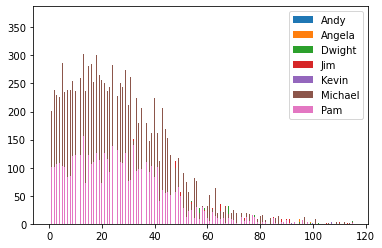

In [51]:
import matplotlib.pyplot as plt

x = df_scenes['scene']

x_val = np.arange(len(x))
width = 0.35

y_andy = (df_scenes['Andy Scene Num'])
y_angela = (df_scenes['Angela Scene Num'])
y_dwight = (df_scenes['Dwight Scene Num'])
y_jim = (df_scenes['Jim Scene Num'])
y_kevin = (df_scenes['Kevin Scene Num'])
y_michael = (df_scenes['Michael Scene Num'])
y_pam = (df_scenes['Pam Scene Num'])

fig, ax = plt.subplots()
bar1 = ax.bar(x_val - width/7, y_andy, width, label = "Andy")
bar2 = ax.bar(x_val - width/7, y_angela, width, label = "Angela")
bar3 = ax.bar(x_val - width/7, y_dwight, width, label = "Dwight")
bar4 = ax.bar(x_val - width/7, y_jim, width, label = "Jim")
bar5 = ax.bar(x_val - width/7, y_kevin, width, label = "Kevin")
bar6 = ax.bar(x_val - width/7, y_michael, width, label = "Michael")
bar7 = ax.bar(x_val - width/7, y_pam, width, label = "Pam")

ax.legend()

plt.show()

### Which character has the most lines deleted lines?

In [55]:
df_deleted = df_char.groupby(['deleted', 'speaker']).size().reset_index(name='Deleted Num')
df_deleted

,deleted,speaker,Deleted Num
0,False,Andy,3968
1,False,Angela,1658
2,False,Dwight,7169
3,False,Jim,6611
4,False,Kevin,1668
5,False,Michael,11577
6,False,Pam,5206
7,True,Angela,37
8,True,Dwight,362
9,True,Jim,205


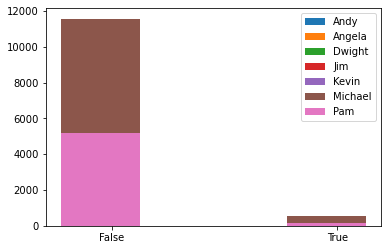

In [64]:
x = ['False','True']

x_val = np.arange(len(x))
width = 0.35

y_andy = [3968, 0]
y_angela = [1658, 37]
y_dwight = [7169, 362]
y_jim = [6611, 205]
y_kevin = [1668, 40]
y_michael = [11577, 563]
y_pam = [5206, 170]

fig, ax = plt.subplots()
bar1 = ax.bar(x_val - width/7, y_andy, width, label = "Andy")
bar2 = ax.bar(x_val - width/7, y_angela, width, label = "Angela")
bar3 = ax.bar(x_val - width/7, y_dwight, width, label = "Dwight")
bar4 = ax.bar(x_val - width/7, y_jim, width, label = "Jim")
bar5 = ax.bar(x_val - width/7, y_kevin, width, label = "Kevin")
bar6 = ax.bar(x_val - width/7, y_michael, width, label = "Michael")
bar7 = ax.bar(x_val - width/7, y_pam, width, label = "Pam")

ax.legend()
ax.set_xticks(x_val)
ax.set_xticklabels(x)

plt.show()